### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("train.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
print(cust_df['var3'].value_counts( )[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [6]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [11]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=30)

params = {'max_depth':[3, 5] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0]	validation_0-auc:0.689367	validation_1-auc:0.701839
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.792336	validation_1-auc:0.798398
[2]	validation_0-auc:0.789095	validation_1-auc:0.800069
[3]	validation_0-auc:0.793323	validation_1-auc:0.805475
[4]	validation_0-auc:0.802541	validation_1-auc:0.81157
[5]	validation_0-auc:0.799073	validation_1-auc:0.809299
[6]	validation_0-auc:0.798946	validation_1-auc:0.809122
[7]	validation_0-auc:0.803144	validation_1-auc:0.813628
[8]	validation_0-auc:0.808074	validation_1-auc:0.816927
[9]	validation_0-auc:0.809639	validation_1-auc:0.818573
[10]	validation_0-auc:0.810211	validation_1-auc:0.818713
[11]	validation_0-auc:0.811347	validation_1-auc:0.820436
[12]	validation_0-auc:0.817519	validation_1-auc:0.824098
[13]	validation_0-auc:0.812046	validation_1-auc:0.818945
[14]	validation_0-auc:0.812373	validation_1-auc:0.818534

[12]	validation_0-auc:0.825079	validation_1-auc:0.828382
[13]	validation_0-auc:0.820475	validation_1-auc:0.823571
[14]	validation_0-auc:0.819075	validation_1-auc:0.820899
[15]	validation_0-auc:0.822675	validation_1-auc:0.822817
[16]	validation_0-auc:0.824738	validation_1-auc:0.825109
[17]	validation_0-auc:0.826108	validation_1-auc:0.827414
[18]	validation_0-auc:0.828607	validation_1-auc:0.829556
[19]	validation_0-auc:0.828514	validation_1-auc:0.828362
[20]	validation_0-auc:0.830631	validation_1-auc:0.830347
[21]	validation_0-auc:0.829059	validation_1-auc:0.828427
[22]	validation_0-auc:0.826141	validation_1-auc:0.826309
[23]	validation_0-auc:0.829575	validation_1-auc:0.82797
[24]	validation_0-auc:0.831118	validation_1-auc:0.830097
[25]	validation_0-auc:0.831154	validation_1-auc:0.829658
[26]	validation_0-auc:0.829822	validation_1-auc:0.828032
[27]	validation_0-auc:0.831871	validation_1-auc:0.830703
[28]	validation_0-auc:0.833781	validation_1-auc:0.832398
[29]	validation_0-auc:0.833587	v

[26]	validation_0-auc:0.847758	validation_1-auc:0.835228
[27]	validation_0-auc:0.849366	validation_1-auc:0.836947
[28]	validation_0-auc:0.850606	validation_1-auc:0.836905
[29]	validation_0-auc:0.850292	validation_1-auc:0.836338
[0]	validation_0-auc:0.714006	validation_1-auc:0.723827
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.804177	validation_1-auc:0.810124
[2]	validation_0-auc:0.797681	validation_1-auc:0.806193
[3]	validation_0-auc:0.805563	validation_1-auc:0.8132
[4]	validation_0-auc:0.816182	validation_1-auc:0.818554
[5]	validation_0-auc:0.811689	validation_1-auc:0.81533
[6]	validation_0-auc:0.811593	validation_1-auc:0.815446
[7]	validation_0-auc:0.819138	validation_1-auc:0.821911
[8]	validation_0-auc:0.822456	validation_1-auc:0.825036
[9]	validation_0-auc:0.822175	validation_1-auc:0.824127
[10]	validation_0-auc:0.826339	validation_1-auc:0.827481
[

In [12]:
# 최종 파라미터 결정 후 n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가.
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.817284	validation_1-auc:0.811534
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.820302	validation_1-auc:0.812178
[2]	validation_0-auc:0.823363	validation_1-auc:0.816027
[3]	validation_0-auc:0.825007	validation_1-auc:0.81705
[4]	validation_0-auc:0.825243	validation_1-auc:0.817264
[5]	validation_0-auc:0.827563	validation_1-auc:0.819988
[6]	validation_0-auc:0.827812	validation_1-auc:0.819542
[7]	validation_0-auc:0.827855	validation_1-auc:0.819216
[8]	validation_0-auc:0.829221	validation_1-auc:0.819799
[9]	validation_0-auc:0.829078	validation_1-auc:0.818898
[10]	validation_0-auc:0.830731	validation_1-auc:0.820967
[11]	validation_0-auc:0.828293	validation_1-auc:0.819437
[12]	validation_0-auc:0.829608	validation_1-auc:0.821204
[13]	validation_0-auc:0.830487	validation_1-auc:0.821121
[14]	validation_0-auc:0.834894	validation_1-auc:0.82706

[141]	validation_0-auc:0.85609	validation_1-auc:0.840527
[142]	validation_0-auc:0.856058	validation_1-auc:0.840824
[143]	validation_0-auc:0.856179	validation_1-auc:0.840714
[144]	validation_0-auc:0.856461	validation_1-auc:0.840902
[145]	validation_0-auc:0.856596	validation_1-auc:0.840922
[146]	validation_0-auc:0.85682	validation_1-auc:0.840999
[147]	validation_0-auc:0.856856	validation_1-auc:0.841113
[148]	validation_0-auc:0.856846	validation_1-auc:0.84122
[149]	validation_0-auc:0.856846	validation_1-auc:0.841151
[150]	validation_0-auc:0.856784	validation_1-auc:0.841142
[151]	validation_0-auc:0.856753	validation_1-auc:0.841307
[152]	validation_0-auc:0.856646	validation_1-auc:0.841443
[153]	validation_0-auc:0.856637	validation_1-auc:0.841588
[154]	validation_0-auc:0.856957	validation_1-auc:0.841629
[155]	validation_0-auc:0.857008	validation_1-auc:0.841672
[156]	validation_0-auc:0.857301	validation_1-auc:0.841631
[157]	validation_0-auc:0.857543	validation_1-auc:0.841666
[158]	validation_

[283]	validation_0-auc:0.872776	validation_1-auc:0.843025
[284]	validation_0-auc:0.872829	validation_1-auc:0.843029
[285]	validation_0-auc:0.872917	validation_1-auc:0.842988
[286]	validation_0-auc:0.87303	validation_1-auc:0.842969
[287]	validation_0-auc:0.873159	validation_1-auc:0.842969
[288]	validation_0-auc:0.873233	validation_1-auc:0.843004
[289]	validation_0-auc:0.873346	validation_1-auc:0.843044
[290]	validation_0-auc:0.87339	validation_1-auc:0.843025
[291]	validation_0-auc:0.873534	validation_1-auc:0.843058
[292]	validation_0-auc:0.873577	validation_1-auc:0.843123
[293]	validation_0-auc:0.87364	validation_1-auc:0.843134
[294]	validation_0-auc:0.873695	validation_1-auc:0.843111
[295]	validation_0-auc:0.873769	validation_1-auc:0.843094
[296]	validation_0-auc:0.873849	validation_1-auc:0.843137
[297]	validation_0-auc:0.873987	validation_1-auc:0.843165
[298]	validation_0-auc:0.874085	validation_1-auc:0.843203
[299]	validation_0-auc:0.874167	validation_1-auc:0.843232
[300]	validation_

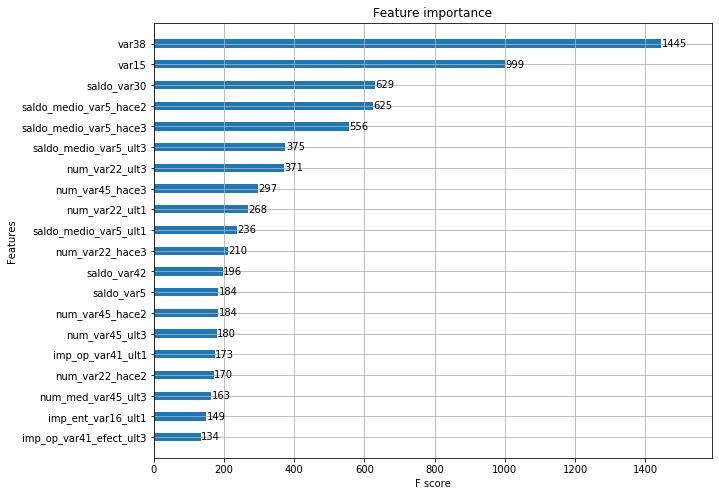

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [14]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

ROC AUC: 0.8396


In [15]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	va

[30]	valid_0's auc: 0.874647	valid_0's binary_logloss: 0.124019	valid_1's auc: 0.83907	valid_1's binary_logloss: 0.13958
[31]	valid_0's auc: 0.875603	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.139539
[32]	valid_0's auc: 0.87651	valid_0's binary_logloss: 0.123413	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139561
[33]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.123199	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.139528
[34]	valid_0's auc: 0.878189	valid_0's binary_logloss: 0.122925	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139567
[35]	valid_0's auc: 0.878765	valid_0's binary_logloss: 0.122704	valid_1's auc: 0.838946	valid_1's binary_logloss: 0.139572
[36]	valid_0's auc: 0.879377	valid_0's binary_logloss: 0.122448	valid_1's auc: 0.83898	valid_1's binary_logloss: 0.139554
[37]	valid_0's auc: 0.880134	valid_0's binary_logloss: 0.122143	valid_1's auc: 0.838888	valid_1's binary_logloss: 0.139557
[38]	valid_0's auc: 

[42]	valid_0's auc: 0.881674	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.839744	valid_1's binary_logloss: 0.139371
[43]	valid_0's auc: 0.882352	valid_0's binary_logloss: 0.121291	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.139358
[44]	valid_0's auc: 0.882869	valid_0's binary_logloss: 0.121117	valid_1's auc: 0.839827	valid_1's binary_logloss: 0.13937
[45]	valid_0's auc: 0.883308	valid_0's binary_logloss: 0.120912	valid_1's auc: 0.839923	valid_1's binary_logloss: 0.139325
[46]	valid_0's auc: 0.883814	valid_0's binary_logloss: 0.120682	valid_1's auc: 0.83985	valid_1's binary_logloss: 0.139336
[47]	valid_0's auc: 0.884201	valid_0's binary_logloss: 0.120532	valid_1's auc: 0.839839	valid_1's binary_logloss: 0.139368
[48]	valid_0's auc: 0.884428	valid_0's binary_logloss: 0.120354	valid_1's auc: 0.839815	valid_1's binary_logloss: 0.139368
[49]	valid_0's auc: 0.884565	valid_0's binary_logloss: 0.120223	valid_1's auc: 0.83995	valid_1's binary_logloss: 0.139355
[50]	valid_0's auc:

[19]	valid_0's auc: 0.864682	valid_0's binary_logloss: 0.128016	valid_1's auc: 0.838411	valid_1's binary_logloss: 0.140669
[20]	valid_0's auc: 0.865346	valid_0's binary_logloss: 0.127585	valid_1's auc: 0.838201	valid_1's binary_logloss: 0.140498
[21]	valid_0's auc: 0.8665	valid_0's binary_logloss: 0.127103	valid_1's auc: 0.83851	valid_1's binary_logloss: 0.140294
[22]	valid_0's auc: 0.867889	valid_0's binary_logloss: 0.126657	valid_1's auc: 0.839074	valid_1's binary_logloss: 0.140136
[23]	valid_0's auc: 0.868624	valid_0's binary_logloss: 0.126281	valid_1's auc: 0.838987	valid_1's binary_logloss: 0.140028
[24]	valid_0's auc: 0.869855	valid_0's binary_logloss: 0.125882	valid_1's auc: 0.838802	valid_1's binary_logloss: 0.139975
[25]	valid_0's auc: 0.870426	valid_0's binary_logloss: 0.125541	valid_1's auc: 0.83912	valid_1's binary_logloss: 0.139815
[26]	valid_0's auc: 0.871649	valid_0's binary_logloss: 0.125171	valid_1's auc: 0.838779	valid_1's binary_logloss: 0.139741
[27]	valid_0's auc: 

[34]	valid_0's auc: 0.876841	valid_0's binary_logloss: 0.123372	valid_1's auc: 0.839078	valid_1's binary_logloss: 0.139459
[35]	valid_0's auc: 0.877422	valid_0's binary_logloss: 0.123118	valid_1's auc: 0.839413	valid_1's binary_logloss: 0.139362
[36]	valid_0's auc: 0.878163	valid_0's binary_logloss: 0.122873	valid_1's auc: 0.839157	valid_1's binary_logloss: 0.139395
[37]	valid_0's auc: 0.87856	valid_0's binary_logloss: 0.122649	valid_1's auc: 0.839051	valid_1's binary_logloss: 0.139443
[38]	valid_0's auc: 0.879102	valid_0's binary_logloss: 0.122415	valid_1's auc: 0.839482	valid_1's binary_logloss: 0.139378
[39]	valid_0's auc: 0.879978	valid_0's binary_logloss: 0.122126	valid_1's auc: 0.83945	valid_1's binary_logloss: 0.139391
[40]	valid_0's auc: 0.880399	valid_0's binary_logloss: 0.121938	valid_1's auc: 0.840127	valid_1's binary_logloss: 0.139314
[41]	valid_0's auc: 0.880914	valid_0's binary_logloss: 0.121757	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.13937
[42]	valid_0's auc:

[13]	valid_0's auc: 0.8711	valid_0's binary_logloss: 0.127994	valid_1's auc: 0.836547	valid_1's binary_logloss: 0.142243
[14]	valid_0's auc: 0.872903	valid_0's binary_logloss: 0.127122	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141718
[15]	valid_0's auc: 0.874543	valid_0's binary_logloss: 0.126262	valid_1's auc: 0.837921	valid_1's binary_logloss: 0.141291
[16]	valid_0's auc: 0.876148	valid_0's binary_logloss: 0.1255	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.14114
[17]	valid_0's auc: 0.878214	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140905
[18]	valid_0's auc: 0.879554	valid_0's binary_logloss: 0.124053	valid_1's auc: 0.836497	valid_1's binary_logloss: 0.140787
[19]	valid_0's auc: 0.880715	valid_0's binary_logloss: 0.123405	valid_1's auc: 0.837087	valid_1's binary_logloss: 0.140481
[20]	valid_0's auc: 0.881492	valid_0's binary_logloss: 0.122867	valid_1's auc: 0.836798	valid_1's binary_logloss: 0.140353
[21]	valid_0's auc: 0.

[38]	valid_0's auc: 0.897344	valid_0's binary_logloss: 0.115335	valid_1's auc: 0.836585	valid_1's binary_logloss: 0.140026
[39]	valid_0's auc: 0.897605	valid_0's binary_logloss: 0.115043	valid_1's auc: 0.836359	valid_1's binary_logloss: 0.140104
[40]	valid_0's auc: 0.898073	valid_0's binary_logloss: 0.114754	valid_1's auc: 0.836432	valid_1's binary_logloss: 0.140096
[41]	valid_0's auc: 0.898701	valid_0's binary_logloss: 0.114389	valid_1's auc: 0.836355	valid_1's binary_logloss: 0.140115
[42]	valid_0's auc: 0.898936	valid_0's binary_logloss: 0.114144	valid_1's auc: 0.836485	valid_1's binary_logloss: 0.14011
[43]	valid_0's auc: 0.899275	valid_0's binary_logloss: 0.11385	valid_1's auc: 0.836213	valid_1's binary_logloss: 0.140214
Early stopping, best iteration is:
[13]	valid_0's auc: 0.870662	valid_0's binary_logloss: 0.128333	valid_1's auc: 0.837981	valid_1's binary_logloss: 0.142696
[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_lo

[23]	valid_0's auc: 0.88451	valid_0's binary_logloss: 0.121226	valid_1's auc: 0.8369	valid_1's binary_logloss: 0.140044
[24]	valid_0's auc: 0.88609	valid_0's binary_logloss: 0.120643	valid_1's auc: 0.836883	valid_1's binary_logloss: 0.139917
[25]	valid_0's auc: 0.887311	valid_0's binary_logloss: 0.120104	valid_1's auc: 0.837018	valid_1's binary_logloss: 0.139879
[26]	valid_0's auc: 0.888754	valid_0's binary_logloss: 0.11961	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.139895
[27]	valid_0's auc: 0.889697	valid_0's binary_logloss: 0.119114	valid_1's auc: 0.836828	valid_1's binary_logloss: 0.139904
[28]	valid_0's auc: 0.891102	valid_0's binary_logloss: 0.118637	valid_1's auc: 0.83685	valid_1's binary_logloss: 0.139833
[29]	valid_0's auc: 0.891823	valid_0's binary_logloss: 0.118217	valid_1's auc: 0.836568	valid_1's binary_logloss: 0.139836
[30]	valid_0's auc: 0.893059	valid_0's binary_logloss: 0.117781	valid_1's auc: 0.836774	valid_1's binary_logloss: 0.139827
[31]	valid_0's auc: 0.

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	va

[27]	valid_0's auc: 0.868525	valid_0's binary_logloss: 0.12589	valid_1's auc: 0.838152	valid_1's binary_logloss: 0.139564
[28]	valid_0's auc: 0.869107	valid_0's binary_logloss: 0.125656	valid_1's auc: 0.838221	valid_1's binary_logloss: 0.139481
[29]	valid_0's auc: 0.869754	valid_0's binary_logloss: 0.12538	valid_1's auc: 0.838255	valid_1's binary_logloss: 0.139428
[30]	valid_0's auc: 0.87056	valid_0's binary_logloss: 0.125113	valid_1's auc: 0.838733	valid_1's binary_logloss: 0.139354
[31]	valid_0's auc: 0.871162	valid_0's binary_logloss: 0.124861	valid_1's auc: 0.838979	valid_1's binary_logloss: 0.139225
[32]	valid_0's auc: 0.871762	valid_0's binary_logloss: 0.124652	valid_1's auc: 0.838753	valid_1's binary_logloss: 0.139233
[33]	valid_0's auc: 0.872722	valid_0's binary_logloss: 0.124394	valid_1's auc: 0.839239	valid_1's binary_logloss: 0.1391
[34]	valid_0's auc: 0.87368	valid_0's binary_logloss: 0.124127	valid_1's auc: 0.839489	valid_1's binary_logloss: 0.139029
[35]	valid_0's auc: 0.

[56]	valid_0's auc: 0.883389	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.83979	valid_1's binary_logloss: 0.139326
[57]	valid_0's auc: 0.88369	valid_0's binary_logloss: 0.120248	valid_1's auc: 0.839887	valid_1's binary_logloss: 0.139321
[58]	valid_0's auc: 0.884025	valid_0's binary_logloss: 0.120078	valid_1's auc: 0.839684	valid_1's binary_logloss: 0.139341
[59]	valid_0's auc: 0.884477	valid_0's binary_logloss: 0.119928	valid_1's auc: 0.839523	valid_1's binary_logloss: 0.139368
[60]	valid_0's auc: 0.884659	valid_0's binary_logloss: 0.119822	valid_1's auc: 0.839745	valid_1's binary_logloss: 0.139362
[61]	valid_0's auc: 0.885121	valid_0's binary_logloss: 0.119618	valid_1's auc: 0.839533	valid_1's binary_logloss: 0.139434
[62]	valid_0's auc: 0.885341	valid_0's binary_logloss: 0.119477	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139385
[63]	valid_0's auc: 0.885487	valid_0's binary_logloss: 0.119367	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139409
[64]	valid_0's auc

[15]	valid_0's auc: 0.858926	valid_0's binary_logloss: 0.130816	valid_1's auc: 0.838543	valid_1's binary_logloss: 0.141466
[16]	valid_0's auc: 0.859532	valid_0's binary_logloss: 0.130275	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.141112
[17]	valid_0's auc: 0.860793	valid_0's binary_logloss: 0.129728	valid_1's auc: 0.837788	valid_1's binary_logloss: 0.140844
[18]	valid_0's auc: 0.861753	valid_0's binary_logloss: 0.12924	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.140599
[19]	valid_0's auc: 0.86298	valid_0's binary_logloss: 0.12873	valid_1's auc: 0.837848	valid_1's binary_logloss: 0.14042
[20]	valid_0's auc: 0.863577	valid_0's binary_logloss: 0.128318	valid_1's auc: 0.837708	valid_1's binary_logloss: 0.140222
[21]	valid_0's auc: 0.864273	valid_0's binary_logloss: 0.127905	valid_1's auc: 0.838031	valid_1's binary_logloss: 0.140093
[22]	valid_0's auc: 0.865086	valid_0's binary_logloss: 0.127531	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.139982
[23]	valid_0's auc: 

[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063
[48]	valid_0's auc: 0.880499	valid_0's binary_logloss: 0.121624	valid_1's auc: 0.840013	valid_1's binary_logloss: 0.139091
[49]	valid_0's auc: 0.880866	valid_0's binary_logloss: 0.121448	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139167
[50]	valid_0's auc: 0.881448	valid_0's binary_logloss: 0.121247	valid_1's auc: 0.839886	valid_1's binary_logloss: 0.139173
[51]	valid_0's auc: 0.881689	valid_0's binary_logloss: 0.121135	valid_1's auc: 0.840158	valid_1's binary_logloss: 0.139144
[52]	valid_0's auc: 0.882122	valid_0's binary_logloss: 0.12097	valid_1's auc: 0.839978	valid_1's binary_logloss: 0.139193
[53]	valid_0's auc: 0.882285	valid_0's binary_logloss: 0.120863	valid_1's auc: 0.83979	valid_1's binary_logloss: 0.139241
[54]	valid_0's auc: 0.882575	valid_0's binary_logloss: 0.120721	valid_1's auc: 0.839521	valid_1's binary_logloss: 0.139335
[55]	valid_0's auc

[40]	valid_0's auc: 0.892568	valid_0's binary_logloss: 0.117061	valid_1's auc: 0.830687	valid_1's binary_logloss: 0.140918
[41]	valid_0's auc: 0.893181	valid_0's binary_logloss: 0.11681	valid_1's auc: 0.830622	valid_1's binary_logloss: 0.140963
[42]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116476	valid_1's auc: 0.830827	valid_1's binary_logloss: 0.140945
Early stopping, best iteration is:
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_lo

[13]	valid_0's auc: 0.869207	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.837902	valid_1's binary_logloss: 0.142287
[14]	valid_0's auc: 0.870823	valid_0's binary_logloss: 0.128463	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.141902
[15]	valid_0's auc: 0.871881	valid_0's binary_logloss: 0.127657	valid_1's auc: 0.83767	valid_1's binary_logloss: 0.141625
[16]	valid_0's auc: 0.873451	valid_0's binary_logloss: 0.126932	valid_1's auc: 0.837454	valid_1's binary_logloss: 0.141273
[17]	valid_0's auc: 0.874754	valid_0's binary_logloss: 0.126215	valid_1's auc: 0.837218	valid_1's binary_logloss: 0.14099
[18]	valid_0's auc: 0.876015	valid_0's binary_logloss: 0.125583	valid_1's auc: 0.837242	valid_1's binary_logloss: 0.140723
[19]	valid_0's auc: 0.876898	valid_0's binary_logloss: 0.125006	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140576
[20]	valid_0's auc: 0.878198	valid_0's binary_logloss: 0.124464	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140492
[21]	valid_0's auc

[35]	valid_0's auc: 0.889746	valid_0's binary_logloss: 0.118573	valid_1's auc: 0.830175	valid_1's binary_logloss: 0.141039
[36]	valid_0's auc: 0.890215	valid_0's binary_logloss: 0.118288	valid_1's auc: 0.830319	valid_1's binary_logloss: 0.140986
[37]	valid_0's auc: 0.890966	valid_0's binary_logloss: 0.117947	valid_1's auc: 0.830443	valid_1's binary_logloss: 0.140993
[38]	valid_0's auc: 0.891474	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.830505	valid_1's binary_logloss: 0.141016
[39]	valid_0's auc: 0.892156	valid_0's binary_logloss: 0.117328	valid_1's auc: 0.830415	valid_1's binary_logloss: 0.140994
[40]	valid_0's auc: 0.892568	valid_0's binary_logloss: 0.117061	valid_1's auc: 0.830687	valid_1's binary_logloss: 0.140918
[41]	valid_0's auc: 0.893181	valid_0's binary_logloss: 0.11681	valid_1's auc: 0.830622	valid_1's binary_logloss: 0.140963
[42]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116476	valid_1's auc: 0.830827	valid_1's binary_logloss: 0.140945
Early stopping, b

[13]	valid_0's auc: 0.869207	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.837902	valid_1's binary_logloss: 0.142287
[14]	valid_0's auc: 0.870823	valid_0's binary_logloss: 0.128463	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.141902
[15]	valid_0's auc: 0.871881	valid_0's binary_logloss: 0.127657	valid_1's auc: 0.83767	valid_1's binary_logloss: 0.141625
[16]	valid_0's auc: 0.873451	valid_0's binary_logloss: 0.126932	valid_1's auc: 0.837454	valid_1's binary_logloss: 0.141273
[17]	valid_0's auc: 0.874754	valid_0's binary_logloss: 0.126215	valid_1's auc: 0.837218	valid_1's binary_logloss: 0.14099
[18]	valid_0's auc: 0.876015	valid_0's binary_logloss: 0.125583	valid_1's auc: 0.837242	valid_1's binary_logloss: 0.140723
[19]	valid_0's auc: 0.876898	valid_0's binary_logloss: 0.125006	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140576
[20]	valid_0's auc: 0.878198	valid_0's binary_logloss: 0.124464	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140492
[21]	valid_0's auc

[37]	valid_0's auc: 0.878948	valid_0's binary_logloss: 0.122495	valid_1's auc: 0.832792	valid_1's binary_logloss: 0.14018
[38]	valid_0's auc: 0.879452	valid_0's binary_logloss: 0.122301	valid_1's auc: 0.832977	valid_1's binary_logloss: 0.140154
[39]	valid_0's auc: 0.880156	valid_0's binary_logloss: 0.122063	valid_1's auc: 0.832913	valid_1's binary_logloss: 0.140188
Early stopping, best iteration is:
[9]	valid_0's auc: 0.850276	valid_0's binary_logloss: 0.135274	valid_1's auc: 0.840042	valid_1's binary_logloss: 0.145043
[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logl

[13]	valid_0's auc: 0.856936	valid_0's binary_logloss: 0.131808	valid_1's auc: 0.838199	valid_1's binary_logloss: 0.142866
[14]	valid_0's auc: 0.857673	valid_0's binary_logloss: 0.131166	valid_1's auc: 0.837548	valid_1's binary_logloss: 0.142532
[15]	valid_0's auc: 0.859044	valid_0's binary_logloss: 0.130533	valid_1's auc: 0.837939	valid_1's binary_logloss: 0.142166
[16]	valid_0's auc: 0.859941	valid_0's binary_logloss: 0.129973	valid_1's auc: 0.837854	valid_1's binary_logloss: 0.141803
[17]	valid_0's auc: 0.861036	valid_0's binary_logloss: 0.129377	valid_1's auc: 0.838222	valid_1's binary_logloss: 0.141476
[18]	valid_0's auc: 0.862799	valid_0's binary_logloss: 0.128809	valid_1's auc: 0.838732	valid_1's binary_logloss: 0.141125
[19]	valid_0's auc: 0.864128	valid_0's binary_logloss: 0.128328	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.140763
[20]	valid_0's auc: 0.864975	valid_0's binary_logloss: 0.127913	valid_1's auc: 0.839957	valid_1's binary_logloss: 0.140513
[21]	valid_0's a

[27]	valid_0's auc: 0.87126	valid_0's binary_logloss: 0.125302	valid_1's auc: 0.833822	valid_1's binary_logloss: 0.140277
[28]	valid_0's auc: 0.872741	valid_0's binary_logloss: 0.124882	valid_1's auc: 0.833886	valid_1's binary_logloss: 0.140255
[29]	valid_0's auc: 0.873424	valid_0's binary_logloss: 0.124594	valid_1's auc: 0.833937	valid_1's binary_logloss: 0.140189
[30]	valid_0's auc: 0.874669	valid_0's binary_logloss: 0.124295	valid_1's auc: 0.834461	valid_1's binary_logloss: 0.140113
[31]	valid_0's auc: 0.875234	valid_0's binary_logloss: 0.124066	valid_1's auc: 0.83444	valid_1's binary_logloss: 0.140064
[32]	valid_0's auc: 0.875809	valid_0's binary_logloss: 0.123813	valid_1's auc: 0.834196	valid_1's binary_logloss: 0.140095
[33]	valid_0's auc: 0.876619	valid_0's binary_logloss: 0.123531	valid_1's auc: 0.834143	valid_1's binary_logloss: 0.140029
[34]	valid_0's auc: 0.877233	valid_0's binary_logloss: 0.123254	valid_1's auc: 0.833865	valid_1's binary_logloss: 0.140055
[35]	valid_0's auc

[58]	valid_0's auc: 0.888615	valid_0's binary_logloss: 0.118451	valid_1's auc: 0.838262	valid_1's binary_logloss: 0.139754
[59]	valid_0's auc: 0.889294	valid_0's binary_logloss: 0.11824	valid_1's auc: 0.837652	valid_1's binary_logloss: 0.139829
Early stopping, best iteration is:
[29]	valid_0's auc: 0.87422	valid_0's binary_logloss: 0.124271	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139581
[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss

[12]	valid_0's auc: 0.869161	valid_0's binary_logloss: 0.129189	valid_1's auc: 0.834149	valid_1's binary_logloss: 0.143493
[13]	valid_0's auc: 0.870667	valid_0's binary_logloss: 0.128249	valid_1's auc: 0.833217	valid_1's binary_logloss: 0.14314
[14]	valid_0's auc: 0.872337	valid_0's binary_logloss: 0.127379	valid_1's auc: 0.833305	valid_1's binary_logloss: 0.14275
[15]	valid_0's auc: 0.873712	valid_0's binary_logloss: 0.126538	valid_1's auc: 0.832635	valid_1's binary_logloss: 0.14257
[16]	valid_0's auc: 0.874704	valid_0's binary_logloss: 0.12582	valid_1's auc: 0.832562	valid_1's binary_logloss: 0.142228
[17]	valid_0's auc: 0.875722	valid_0's binary_logloss: 0.125162	valid_1's auc: 0.832021	valid_1's binary_logloss: 0.142052
[18]	valid_0's auc: 0.877178	valid_0's binary_logloss: 0.124543	valid_1's auc: 0.831549	valid_1's binary_logloss: 0.141895
[19]	valid_0's auc: 0.877995	valid_0's binary_logloss: 0.123978	valid_1's auc: 0.831242	valid_1's binary_logloss: 0.141804
[20]	valid_0's auc: 

[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528	

[22]	valid_0's auc: 0.881423	valid_0's binary_logloss: 0.122355	valid_1's auc: 0.830239	valid_1's binary_logloss: 0.141656
[23]	valid_0's auc: 0.882393	valid_0's binary_logloss: 0.121843	valid_1's auc: 0.830552	valid_1's binary_logloss: 0.141537
[24]	valid_0's auc: 0.884118	valid_0's binary_logloss: 0.121284	valid_1's auc: 0.830946	valid_1's binary_logloss: 0.141426
[25]	valid_0's auc: 0.885236	valid_0's binary_logloss: 0.120821	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.141489
[26]	valid_0's auc: 0.886368	valid_0's binary_logloss: 0.120378	valid_1's auc: 0.829528	valid_1's binary_logloss: 0.141559
[27]	valid_0's auc: 0.88693	valid_0's binary_logloss: 0.119952	valid_1's auc: 0.829491	valid_1's binary_logloss: 0.141578
[28]	valid_0's auc: 0.887827	valid_0's binary_logloss: 0.1195	valid_1's auc: 0.829533	valid_1's binary_logloss: 0.141548
[29]	valid_0's auc: 0.888834	valid_0's binary_logloss: 0.119055	valid_1's auc: 0.829809	valid_1's binary_logloss: 0.141549
[30]	valid_0's auc:

[12]	valid_0's auc: 0.867552	valid_0's binary_logloss: 0.12931	valid_1's auc: 0.837042	valid_1's binary_logloss: 0.14326
[13]	valid_0's auc: 0.870662	valid_0's binary_logloss: 0.128333	valid_1's auc: 0.837981	valid_1's binary_logloss: 0.142696
[14]	valid_0's auc: 0.872498	valid_0's binary_logloss: 0.127408	valid_1's auc: 0.837713	valid_1's binary_logloss: 0.142262
[15]	valid_0's auc: 0.873589	valid_0's binary_logloss: 0.126603	valid_1's auc: 0.837256	valid_1's binary_logloss: 0.141869
[16]	valid_0's auc: 0.875441	valid_0's binary_logloss: 0.125783	valid_1's auc: 0.837912	valid_1's binary_logloss: 0.141528
[17]	valid_0's auc: 0.877154	valid_0's binary_logloss: 0.125036	valid_1's auc: 0.836689	valid_1's binary_logloss: 0.141384
[18]	valid_0's auc: 0.878205	valid_0's binary_logloss: 0.124367	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.141256
[19]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.12371	valid_1's auc: 0.835242	valid_1's binary_logloss: 0.141186
[20]	valid_0's auc:

[36]	valid_0's auc: 0.87467	valid_0's binary_logloss: 0.124165	valid_1's auc: 0.833345	valid_1's binary_logloss: 0.140029
[37]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.123937	valid_1's auc: 0.833447	valid_1's binary_logloss: 0.140009
[38]	valid_0's auc: 0.876178	valid_0's binary_logloss: 0.123686	valid_1's auc: 0.833499	valid_1's binary_logloss: 0.139986
[39]	valid_0's auc: 0.876802	valid_0's binary_logloss: 0.123446	valid_1's auc: 0.833868	valid_1's binary_logloss: 0.139955
Early stopping, best iteration is:
[9]	valid_0's auc: 0.849213	valid_0's binary_logloss: 0.135881	valid_1's auc: 0.838015	valid_1's binary_logloss: 0.1453
[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logl

[28]	valid_0's auc: 0.87009	valid_0's binary_logloss: 0.125841	valid_1's auc: 0.838418	valid_1's binary_logloss: 0.139661
[29]	valid_0's auc: 0.870611	valid_0's binary_logloss: 0.125574	valid_1's auc: 0.838527	valid_1's binary_logloss: 0.139586
[30]	valid_0's auc: 0.871288	valid_0's binary_logloss: 0.125351	valid_1's auc: 0.838578	valid_1's binary_logloss: 0.139533
[31]	valid_0's auc: 0.871941	valid_0's binary_logloss: 0.125092	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.139431
[32]	valid_0's auc: 0.872841	valid_0's binary_logloss: 0.124816	valid_1's auc: 0.839243	valid_1's binary_logloss: 0.139362
[33]	valid_0's auc: 0.873443	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839482	valid_1's binary_logloss: 0.139288
[34]	valid_0's auc: 0.874317	valid_0's binary_logloss: 0.124327	valid_1's auc: 0.839612	valid_1's binary_logloss: 0.139266
[35]	valid_0's auc: 0.875065	valid_0's binary_logloss: 0.124053	valid_1's auc: 0.839746	valid_1's binary_logloss: 0.139241
[36]	valid_0's au

[27]	valid_0's auc: 0.86794	valid_0's binary_logloss: 0.126301	valid_1's auc: 0.832427	valid_1's binary_logloss: 0.140421
[28]	valid_0's auc: 0.869472	valid_0's binary_logloss: 0.125953	valid_1's auc: 0.833075	valid_1's binary_logloss: 0.14028
[29]	valid_0's auc: 0.870369	valid_0's binary_logloss: 0.125647	valid_1's auc: 0.833494	valid_1's binary_logloss: 0.140215
[30]	valid_0's auc: 0.871105	valid_0's binary_logloss: 0.12536	valid_1's auc: 0.83327	valid_1's binary_logloss: 0.140214
[31]	valid_0's auc: 0.871414	valid_0's binary_logloss: 0.125161	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.140216
[32]	valid_0's auc: 0.872281	valid_0's binary_logloss: 0.12493	valid_1's auc: 0.833344	valid_1's binary_logloss: 0.140148
[33]	valid_0's auc: 0.873038	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.833307	valid_1's binary_logloss: 0.140091
[34]	valid_0's auc: 0.873571	valid_0's binary_logloss: 0.124499	valid_1's auc: 0.833239	valid_1's binary_logloss: 0.140069
[35]	valid_0's auc: 0

[21]	valid_0's auc: 0.864129	valid_0's binary_logloss: 0.128163	valid_1's auc: 0.838539	valid_1's binary_logloss: 0.140401
[22]	valid_0's auc: 0.865066	valid_0's binary_logloss: 0.127776	valid_1's auc: 0.838552	valid_1's binary_logloss: 0.140268
[23]	valid_0's auc: 0.866036	valid_0's binary_logloss: 0.127415	valid_1's auc: 0.838667	valid_1's binary_logloss: 0.140163
[24]	valid_0's auc: 0.866894	valid_0's binary_logloss: 0.127047	valid_1's auc: 0.838711	valid_1's binary_logloss: 0.139983
[25]	valid_0's auc: 0.867646	valid_0's binary_logloss: 0.126759	valid_1's auc: 0.83898	valid_1's binary_logloss: 0.13986
[26]	valid_0's auc: 0.868321	valid_0's binary_logloss: 0.126486	valid_1's auc: 0.83866	valid_1's binary_logloss: 0.139795
[27]	valid_0's auc: 0.869533	valid_0's binary_logloss: 0.126137	valid_1's auc: 0.838474	valid_1's binary_logloss: 0.13973
[28]	valid_0's auc: 0.87009	valid_0's binary_logloss: 0.125841	valid_1's auc: 0.838418	valid_1's binary_logloss: 0.139661
[29]	valid_0's auc: 0

[10]	valid_0's auc: 0.863676	valid_0's binary_logloss: 0.132396	valid_1's auc: 0.834954	valid_1's binary_logloss: 0.144707
[11]	valid_0's auc: 0.865339	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835252	valid_1's binary_logloss: 0.144034
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[13]	valid_0's auc: 0.868751	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.835225	valid_1's binary_logloss: 0.142853
[14]	valid_0's auc: 0.870283	valid_0's binary_logloss: 0.128551	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.142412
[15]	valid_0's auc: 0.871366	valid_0's binary_logloss: 0.127828	valid_1's auc: 0.834681	valid_1's binary_logloss: 0.142173
[16]	valid_0's auc: 0.87234	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.834555	valid_1's binary_logloss: 0.141876
[17]	valid_0's auc: 0.872963	valid_0's binary_logloss: 0.126553	valid_1's auc: 0.833341	valid_1's binary_logloss: 0.141845
[18]	valid_0's auc

[38]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.116783	valid_1's auc: 0.83897	valid_1's binary_logloss: 0.139067
[39]	valid_0's auc: 0.895447	valid_0's binary_logloss: 0.116421	valid_1's auc: 0.838515	valid_1's binary_logloss: 0.139143
[40]	valid_0's auc: 0.896177	valid_0's binary_logloss: 0.116084	valid_1's auc: 0.838353	valid_1's binary_logloss: 0.13918
[41]	valid_0's auc: 0.896821	valid_0's binary_logloss: 0.115822	valid_1's auc: 0.837933	valid_1's binary_logloss: 0.139263
[42]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139286
[43]	valid_0's auc: 0.898208	valid_0's binary_logloss: 0.115195	valid_1's auc: 0.838087	valid_1's binary_logloss: 0.139312
[44]	valid_0's auc: 0.899032	valid_0's binary_logloss: 0.114921	valid_1's auc: 0.837956	valid_1's binary_logloss: 0.139352
[45]	valid_0's auc: 0.899435	valid_0's binary_logloss: 0.114646	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.139425
[46]	valid_0's auc

[11]	valid_0's auc: 0.865339	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835252	valid_1's binary_logloss: 0.144034
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[13]	valid_0's auc: 0.868751	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.835225	valid_1's binary_logloss: 0.142853
[14]	valid_0's auc: 0.870283	valid_0's binary_logloss: 0.128551	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.142412
[15]	valid_0's auc: 0.871366	valid_0's binary_logloss: 0.127828	valid_1's auc: 0.834681	valid_1's binary_logloss: 0.142173
[16]	valid_0's auc: 0.87234	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.834555	valid_1's binary_logloss: 0.141876
[17]	valid_0's auc: 0.872963	valid_0's binary_logloss: 0.126553	valid_1's auc: 0.833341	valid_1's binary_logloss: 0.141845
[18]	valid_0's auc: 0.874019	valid_0's binary_logloss: 0.125934	valid_1's auc: 0.833684	valid_1's binary_logloss: 0.141515
[19]	valid_0's auc

[35]	valid_0's auc: 0.892153	valid_0's binary_logloss: 0.117818	valid_1's auc: 0.838839	valid_1's binary_logloss: 0.139022
[36]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117475	valid_1's auc: 0.838585	valid_1's binary_logloss: 0.139057
[37]	valid_0's auc: 0.893672	valid_0's binary_logloss: 0.117095	valid_1's auc: 0.838499	valid_1's binary_logloss: 0.139109
[38]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.116783	valid_1's auc: 0.83897	valid_1's binary_logloss: 0.139067
[39]	valid_0's auc: 0.895447	valid_0's binary_logloss: 0.116421	valid_1's auc: 0.838515	valid_1's binary_logloss: 0.139143
[40]	valid_0's auc: 0.896177	valid_0's binary_logloss: 0.116084	valid_1's auc: 0.838353	valid_1's binary_logloss: 0.13918
[41]	valid_0's auc: 0.896821	valid_0's binary_logloss: 0.115822	valid_1's auc: 0.837933	valid_1's binary_logloss: 0.139263
[42]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139286
[43]	valid_0's auc

[9]	valid_0's auc: 0.854683	valid_0's binary_logloss: 0.135137	valid_1's auc: 0.842811	valid_1's binary_logloss: 0.144866
[10]	valid_0's auc: 0.855596	valid_0's binary_logloss: 0.134048	valid_1's auc: 0.843186	valid_1's binary_logloss: 0.143872
[11]	valid_0's auc: 0.856352	valid_0's binary_logloss: 0.133075	valid_1's auc: 0.843465	valid_1's binary_logloss: 0.14305
[12]	valid_0's auc: 0.857769	valid_0's binary_logloss: 0.132232	valid_1's auc: 0.843222	valid_1's binary_logloss: 0.142376
[13]	valid_0's auc: 0.859429	valid_0's binary_logloss: 0.131427	valid_1's auc: 0.843564	valid_1's binary_logloss: 0.141783
[14]	valid_0's auc: 0.86094	valid_0's binary_logloss: 0.130658	valid_1's auc: 0.843389	valid_1's binary_logloss: 0.141419
[15]	valid_0's auc: 0.862567	valid_0's binary_logloss: 0.129955	valid_1's auc: 0.84365	valid_1's binary_logloss: 0.141
[16]	valid_0's auc: 0.864351	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.84379	valid_1's binary_logloss: 0.140661
[17]	valid_0's auc: 0.86

In [16]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss: